      Age Bicycle Type                        Year  Distance
0    0-17       Normal  2018 Distance (*1 billion)      3.69
1    0-17     Electric  2018 Distance (*1 billion)      0.17
2   18-29       Normal  2018 Distance (*1 billion)      2.53
3   18-29     Electric  2018 Distance (*1 billion)      0.15
4   30-39       Normal  2018 Distance (*1 billion)      1.65
..    ...          ...                         ...       ...
59  60-69     Electric  2021 Distance (*1 billion)      1.36
60  70-79       Normal  2021 Distance (*1 billion)      0.71
61  70-79     Electric  2021 Distance (*1 billion)      1.20
62    80+       Normal  2021 Distance (*1 billion)      0.14
63    80+     Electric  2021 Distance (*1 billion)      0.27

[64 rows x 4 columns]


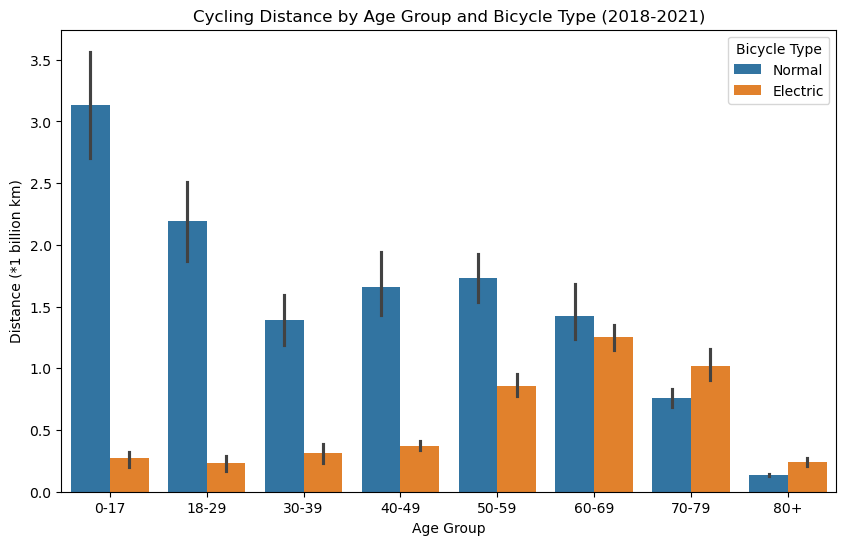

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from CSV into a DataFrame
df = pd.read_csv('cycling_data.csv')

# Reshape the data using melt to have a long-form DataFrame (needed for grouped barplot)
df_melted = pd.melt(df, id_vars=["Age", "Bicycle Type"], 
                    value_vars=["2018 Distance (*1 billion)", "2019 Distance (*1 billion)", 
                                "2020 Distance (*1 billion)", "2021 Distance (*1 billion)"], 
                    var_name="Year", value_name="Distance")

print(df_melted)

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Distance', hue='Bicycle Type', data=df_melted)

# put in labels
plt.title('Cycling Distance by Age Group and Bicycle Type (2018-2021)')
plt.xlabel('Age Group')
plt.ylabel('Distance (*1 billion km)')


# Show the plot
plt.show()


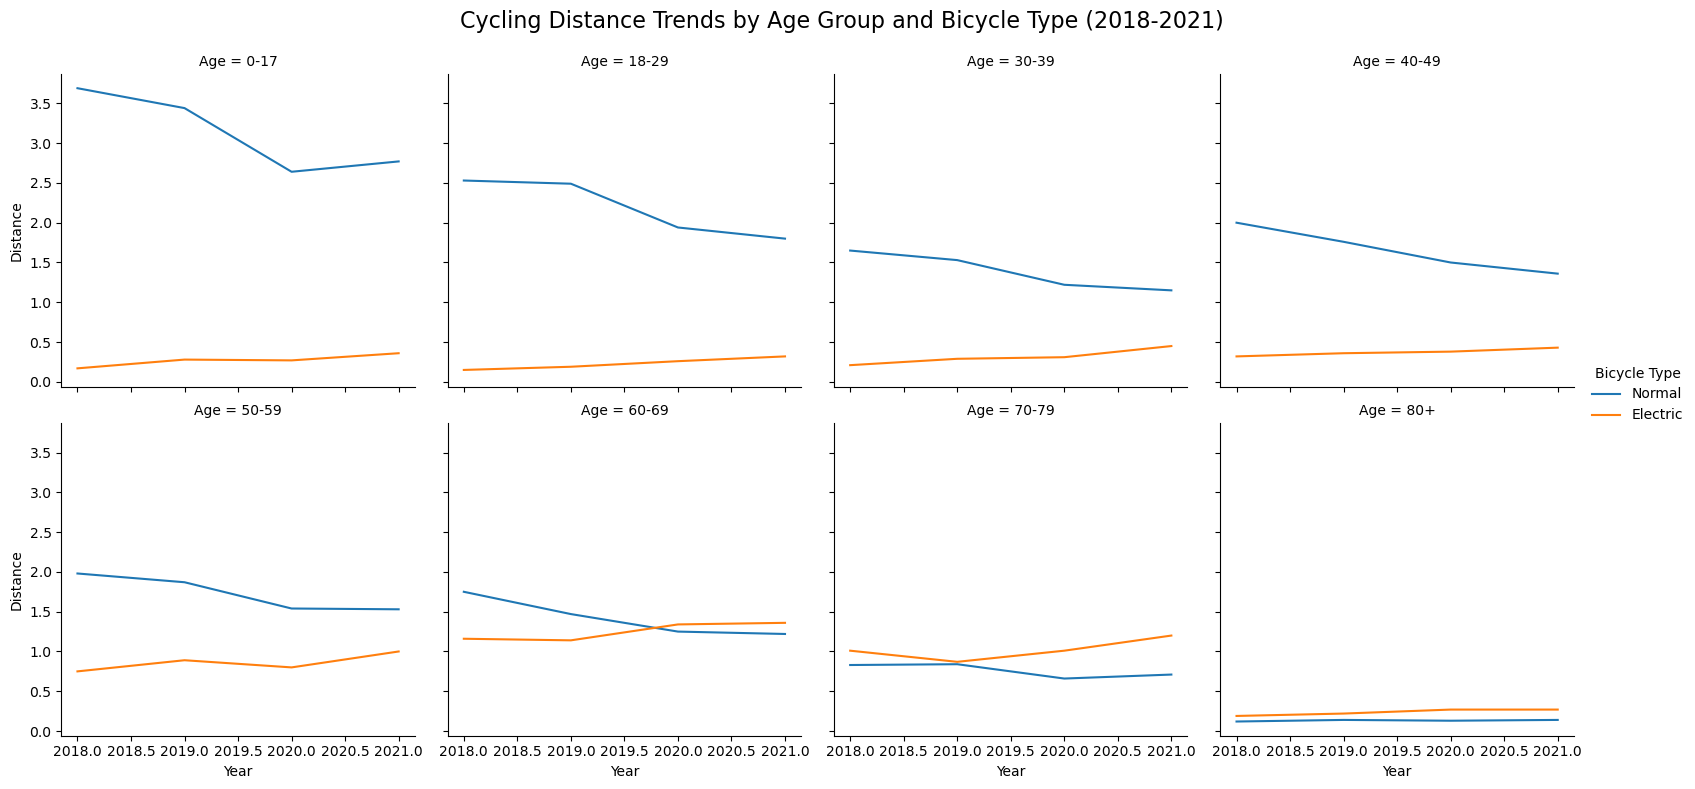

In [19]:
# Convert 'Year' from string format to actual year
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Create a FacetGrid for line plots, maximum of 4 plots per row
g = sns.FacetGrid(df_melted, col="Age", hue="Bicycle Type", col_wrap=4, height=4)

# Map lineplot on each of the facets
g.map(sns.lineplot, "Year", "Distance").add_legend()

# Set title for the figure
g.fig.suptitle('Cycling Distance Trends by Age Group and Bicycle Type (2018-2021)', fontsize=16)

# Adjust layout
g.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

